# Análisis de una fabricación anual de queso camembert usando python

In [ ]:
import os, sys
import os, sys
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import locale # para fechas y nombres de fechas en español
from scipy.stats import norm

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta a tu Mi Unidad en Google Drive
google_drive_path = '/content/drive/MyDrive/Colab Notebooks/'

try:
    os.chdir(google_drive_path)
    print(f"Directorio de trabajo cambiado a: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: La ruta '{google_drive_path}' no se encontró. Asegúrate de que Google Drive esté montado correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cambiar el directorio: {e}")

Directorio de trabajo cambiado a: /content/drive/MyDrive/Colab Notebooks


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

Es necesario cargar el fichero `camember.csv`en el espacio de trabajo de Google Colaborate. Una vez cargado, verificamos que existe y hay acceso:

In [ ]:
os.path.exists("camembert.csv")

True

In [ ]:
#df = pd.read_csv("camembert.csv" , sep = """, decimal = ",")
df = pd.read_csv("camembert.csv", decimal = ",")
df['fecha']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha',inplace=True)
df.sort_index(inplace=True)


In [ ]:
print(df.head())

            fabricacion    est    mg    ph  cloruros  coliformes
fecha                                                           
2020-01-02            1  46.22  23.0  4.61      1.88         0.0
2020-01-03            1  45.28  23.0  4.78      1.62         0.0
2020-01-06            1  45.11  23.0  4.72      1.69      2000.0
2020-01-08            1  49.05  23.5  4.68      1.65      6000.0
2020-01-09            1  47.82  25.0  4.66      1.37       100.0


In [ ]:
df.dtypes

,0
fabricacion,int64
est,float64
mg,float64
ph,float64
cloruros,float64
coliformes,float64


<Axes: >

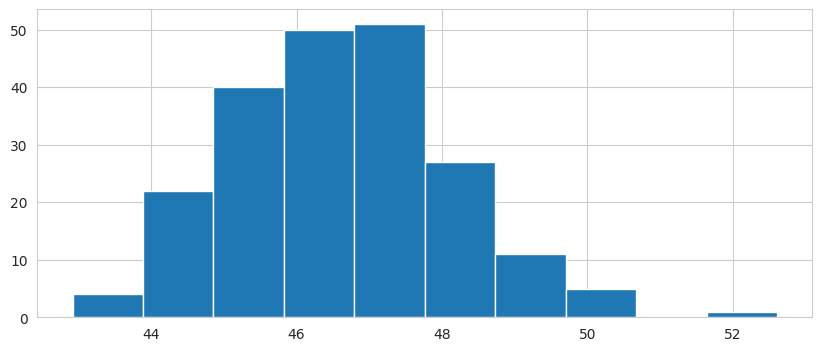

In [ ]:
df["est"].hist()

<Axes: >

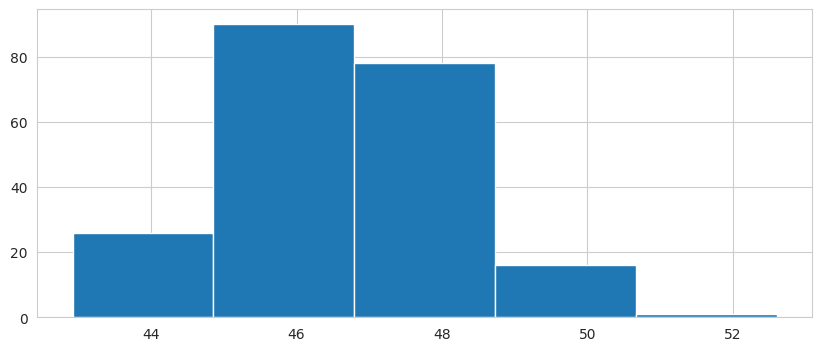

In [ ]:
df["est"].hist(bins = 5)

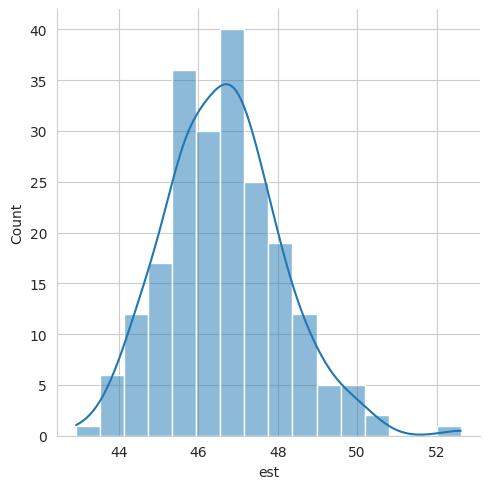

In [ ]:
sns.displot(df["est"], kde = True)

<Axes: ylabel='est'>

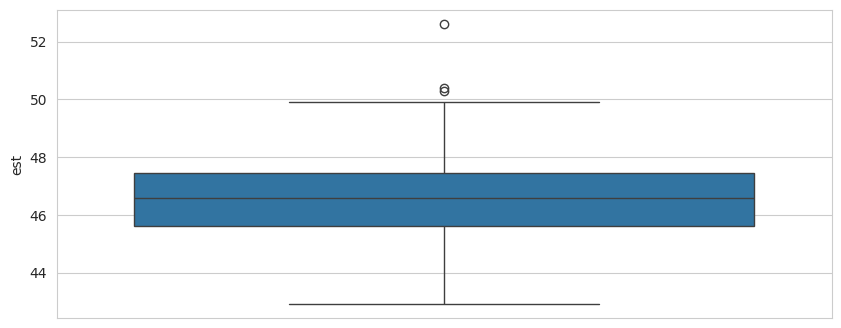

In [ ]:
sns.boxplot(df['est'])

<Axes: xlabel='mes', ylabel='est'>

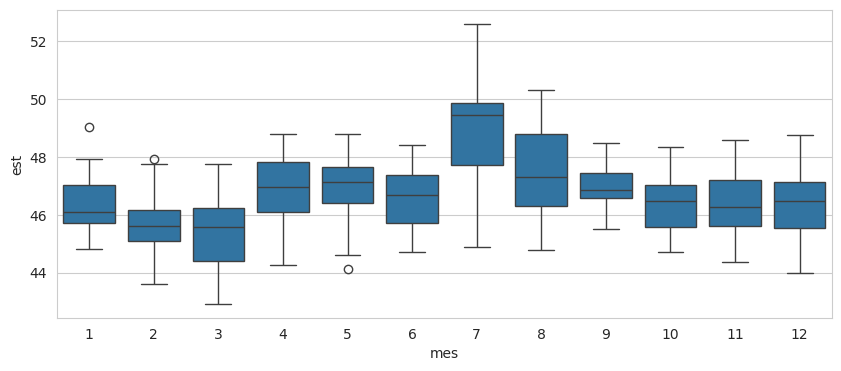

In [ ]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='est', data=df)

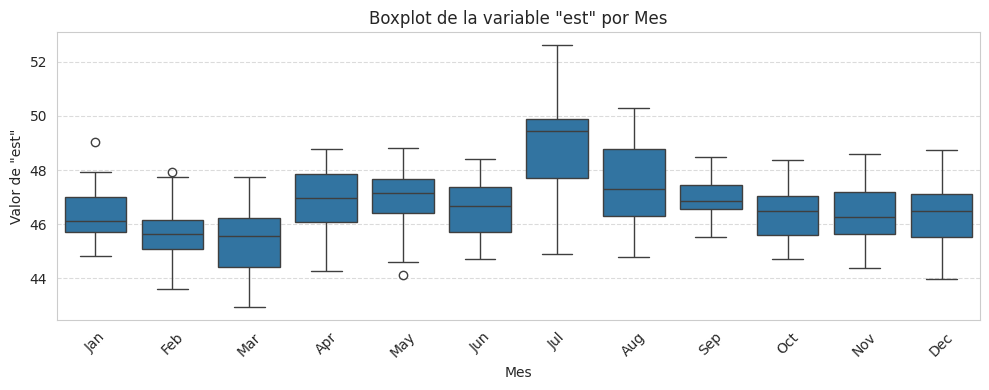

In [ ]:
df['mes_abreviado'] = df.index.strftime('%b')
sns.boxplot(x='mes_abreviado', y='est', data=df)
# Opcional: Personalizar el gráfico
plt.title('Boxplot de la variable "est" por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor de "est"')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para mejor lectura
plt.xticks(rotation=45) # Rotar las etiquetas del eje X si son muchas
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado

plt.show()


<Axes: xlabel='fecha'>

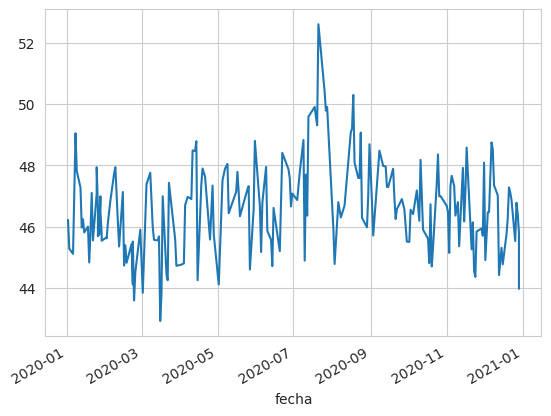

In [ ]:
df["est"].plot()

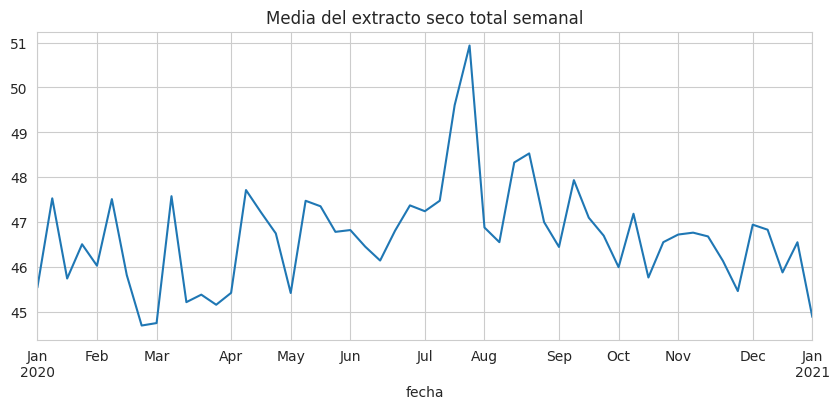

In [ ]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["est"].dropna())
ts.resample('W-MON').mean().plot(title="Media del extracto seco total semanal");

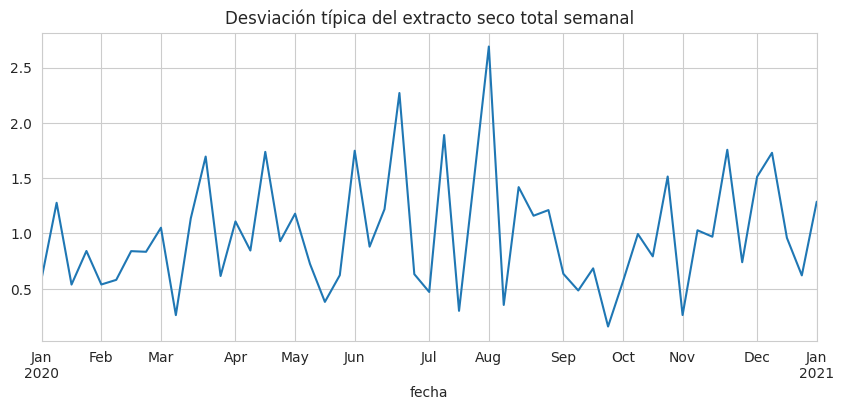

In [ ]:
ts.resample('W-MON').std().plot(title="Desviación típica del extracto seco total semanal");

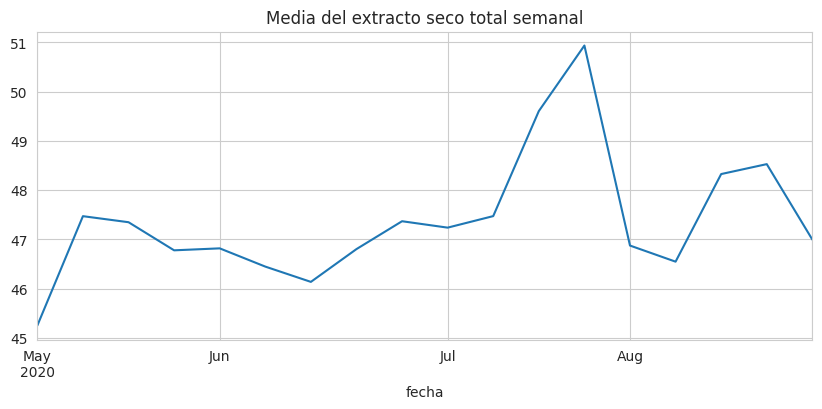

In [ ]:
ts["2020-05":"2020-08"].resample('W-MON').mean().plot(title="Media del extracto seco total semanal");

<Axes: xlabel='fecha', ylabel='est'>

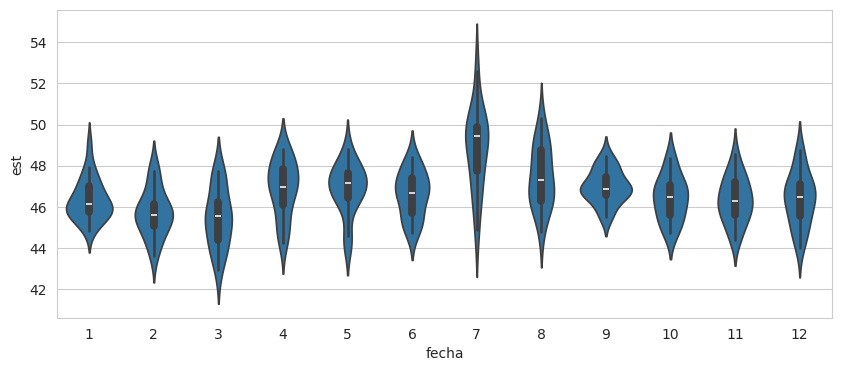

In [ ]:
sns.violinplot(y=df["est"], x=df.index.month)

ver https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [ ]:
df = pd.read_csv("camembert.csv" , decimal = ",")
df['fecha']= pd.DatetimeIndex(df.fecha).normalize()
# df.set_index('fecha',inplace=True)
df.drop(['fabricacion','mg', 'cloruros','coliformes'], axis=1, inplace = True)

In [ ]:
df2 = df['est'].groupby(df['fecha'].dt.isocalendar().week).agg(['mean','std'])


In [ ]:
df2.head()

,mean,std
week,,
1,45.7500,0.664680
2,47.3125,1.646134
3,45.7700,0.547494
4,46.5400,0.893476
5,46.0150,0.522986


<Axes: xlabel='week'>

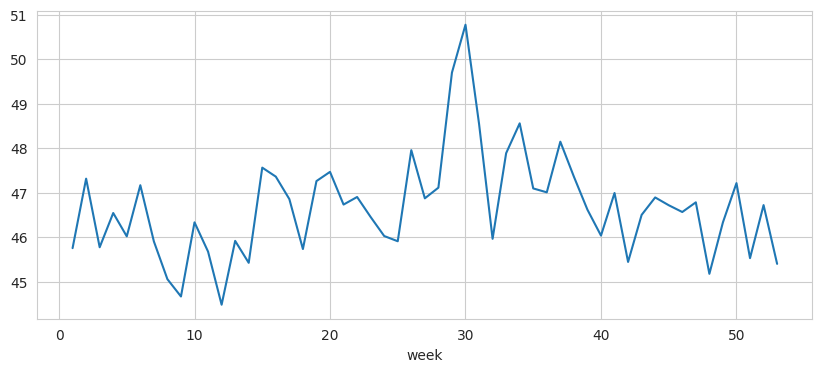

In [ ]:
df2['mean'].plot()

<Axes: xlabel='week'>

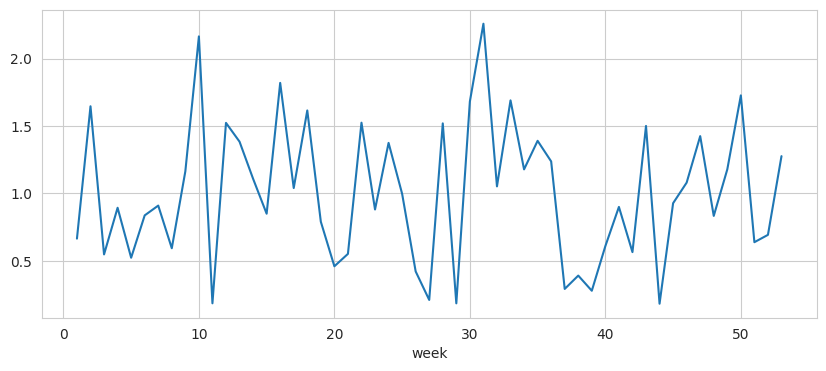

In [ ]:
df2['std'].plot()

In [ ]:
LSL = df2['mean'] - 3 * df2['std']    ## lower specification limit
USL = df2['mean'] + 3 * df2['std']    ## upper specification limit

df2.insert(2,'LSL', LSL)
df2.insert(3,'USL', USL)

# limite_rechazo = 231    ##
# limite_deficientes = 242    ##
# df3.insert(5,'rechazo', limite_rechazo)
# df3.insert(6,'deficientes', limite_deficientes)


In [ ]:
df2.head()

,mean,std,LSL,USL
week,,,,
1,45.7500,0.664680,43.755959,47.744041
2,47.3125,1.646134,42.374097,52.250903
3,45.7700,0.547494,44.127517,47.412483
4,46.5400,0.893476,43.859571,49.220429
5,46.0150,0.522986,44.446042,47.583958


In [ ]:
df2['semana'] = df2.index # necesitamos la semana en una columna de valor
df3 = pd.melt(df2, id_vars= ['semana'], value_vars=["mean","LSL", "USL"],  value_name="valores")

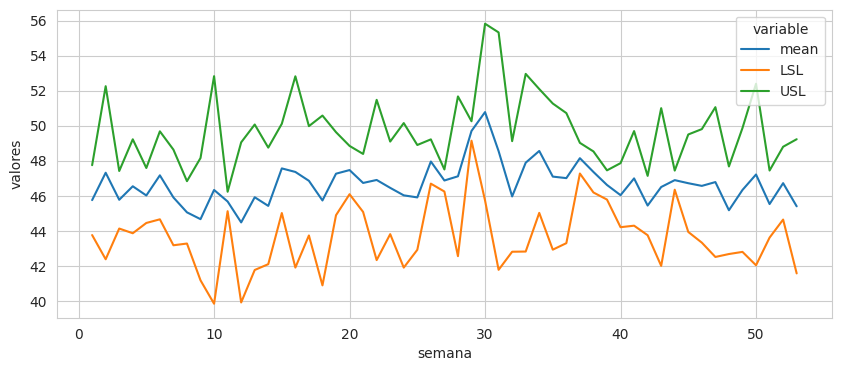

In [ ]:
g = sns.lineplot(data=df3, x="semana", y="valores", hue="variable")